<table>
  <tr>
    <td style="width: 60%; vertical-align: top; font-size: 14px; line-height: 1.6;">
      <h2 style="margin-top: 0;">Cybersecurity Threats Analysis 2015–2024</h2>
      <p><strong>Goal:</strong> Identify key trends, risks, and patterns in global cyberattacks from 2015 to 2024.</p>
      <p><strong>Main questions:</strong></p>
      <ul>
        <li>Which attack types are increasing over time?</li>
        <li>Which industries lose the most money?</li>
        <li>What sources are behind the attacks?</li>
        <li>Which defense methods reduce resolution time?</li>
      </ul>
      </ul>
      <p><strong>Attack Type Overview:</strong></p>
      <ul>
        <li><strong>Phishing:</strong> Deceptive emails trick users into revealing credentials.</li>
        <li><strong>Ransomware:</strong> Encrypts systems and demands payment for restoration.</li>
        <li><strong>DDoS:</strong> Overloads systems with traffic, causing service outages.</li>
        <li><strong>Man-in-the-Middle:</strong> Intercepts communication between users and systems.</li>
        <li><strong>Credential Stuffing:</strong> Reuses leaked passwords to access accounts.</li>
        <li><strong>Insider Threat:</strong> Employees or contractors misuse access.</li>
      </ul>
    </td>
    <td style="width: 70%; text-align: right;">
      <img src="cyber_threats_intro.png" width="1800">
    </td>
  </tr>
</table>


### Each row represents a single attack event.

* Country: the country where the incident occurred

* Year: the year when the attack took place

* Attack Type: the method used by the attackers, such as phishing, ransomware, or DDoS

* Target Industry: the sector targeted, including healthcare, banking, government, and others 

* Financial Loss (in Million $): the estimated financial damage caused by the attack

* Number of Affected Users: the number of individuals or user accounts impacted

* Attack Source: the origin of the attack, such as nation-state, hacker group, insider, or unknown

* Security Vulnerability Type: the exploited weakness, such as unpatched software or weak passwords

* Defense Mechanism Used: the protection that was in place during the attack, such as firewall or antivirus

* Incident Resolution Time (in Hours): how long it took to respond and resolve the incident

In [524]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")
palette = sns.color_palette("tab10")

### Data Source: 
https://www.kaggle.com/datasets/atharvasoundankar/global-cybersecurity-threats-2015-2024

In [2]:
df = pd.read_csv('/Users/ludmiladolontaeva/Downloads/Global_Cybersecurity_Threats_2015-2024.csv')
df.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


## Part 1: Which attack types are increasing over time?

### 1.1 Cyberattack Composition by Year (Stacked Bar)

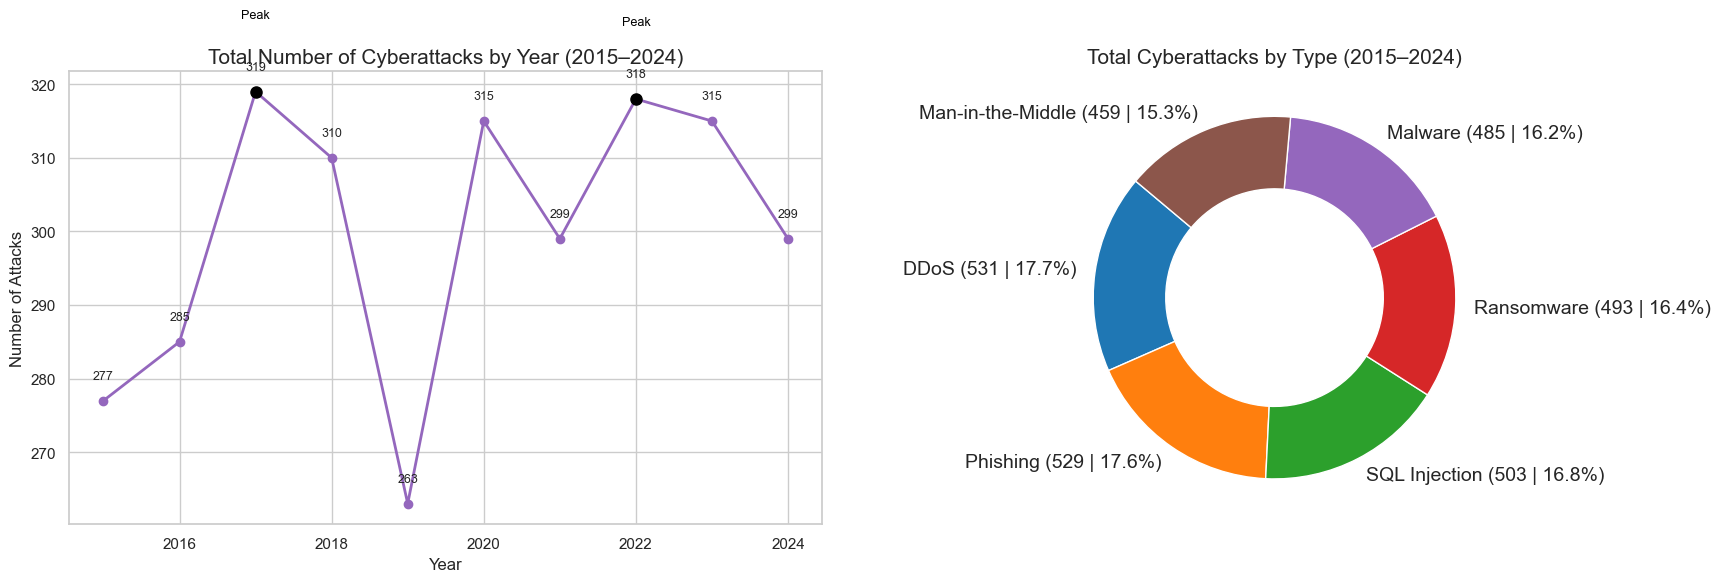

In [525]:
attack_trends = df.groupby(['Year', 'Attack Type']).size().unstack(fill_value=0)
total_attacks = attack_trends.sum(axis=1)
attack_totals = df['Attack Type'].value_counts().sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

axes[0].plot(total_attacks.index, total_attacks.values, color=palette[4], marker='o', linewidth=2)
for x, y in zip(total_attacks.index, total_attacks.values):
    axes[0].text(x, y + 3, str(y), ha='center', fontsize=9)
for year in [2017, 2022]:
    y_val = total_attacks[year]
    axes[0].plot(year, y_val, 'o', color='black', markersize=8)
    axes[0].text(year, y_val + 10, 'Peak', ha='center', color='black', fontsize=9)
axes[0].set_title('Total Number of Cyberattacks by Year (2015–2024)', fontsize=15)
axes[0].set_xlabel('Year', fontsize=12)
axes[0].set_ylabel('Number of Attacks', fontsize=12)
axes[0].grid(True)

labels = [f"{label} ({count} | {percent:.1f}%)" 
          for label, count, percent in zip(
              attack_totals.index,
              attack_totals.values,
              100 * attack_totals.values / attack_totals.values.sum()
          )]

axes[1].pie(
    attack_totals.values,
    labels=labels,
    startangle=140,
    colors=[palette[i % len(palette)] for i in range(len(attack_totals))],
    wedgeprops=dict(width=0.4),
    textprops={'fontsize': 14}
)
axes[1].set_title('Total Cyberattacks by Type (2015–2024)', fontsize=15)

plt.tight_layout()
plt.show()


**Chart 1** : Total Cyberattacks by Year (2015–2024)

Insight:
Cyberattacks peaked in 2017 (320) and again in 2022 (318), indicating a likely 5-year escalation cycle. In 2024, incidents dropped slightly to 299, but the overall threat level remains consistently high, not reverting to pre-2015 levels.

Action:
Prepare for cyclical surges (next likely in 2027).
Deploy scalable, elastic security infrastructure that can ramp up in pre-peak years.
Set up early anomaly detection triggers 12–24 months in advance to anticipate buildup.

**Chart 2** : Total Cyberattacks by Type (2015-2024)

Insight:
Phishing (20.5%) and DDoS (18.4%) dominate the threat landscape, jointly responsible for nearly 2 in 5 attacks.
No single type exceeds 25%, indicating a broadly distributed threat profile.
Man-in-the-Middle is least frequent (13.3%) but still significant.

Action:
Ensure multi-layered protection across all major attack types.
Prioritize phishing filters and DDoS mitigation tools.
Harden systems against SQL injection (16.9%) and maintain active malware containment (15.9%) strategies.

### 1.2 Trend of Top 3 Attack Types by Year (2015–2024)

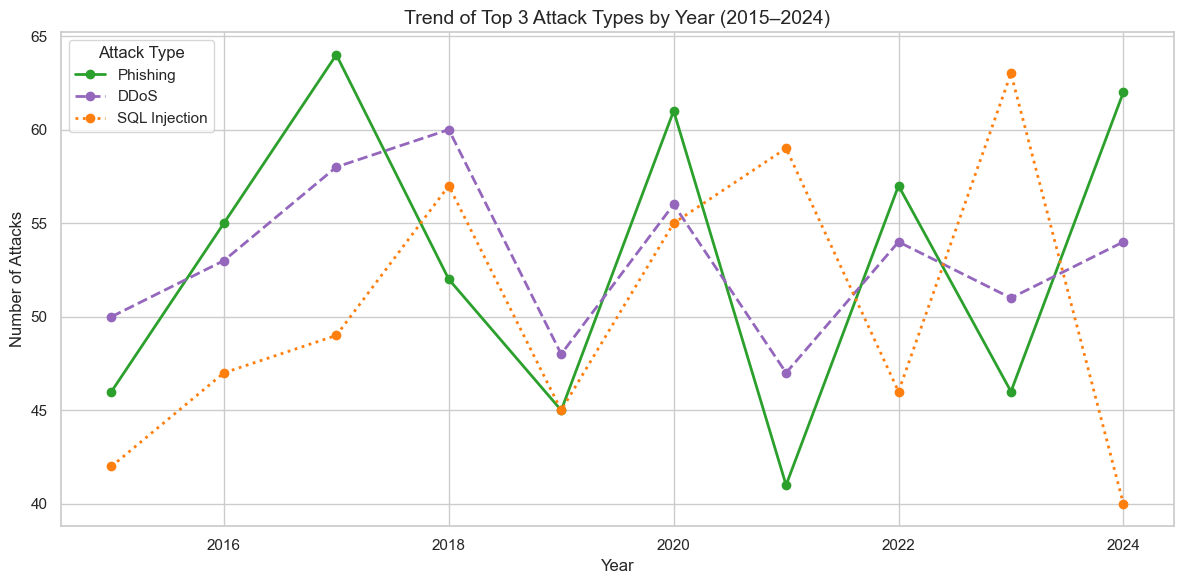

In [528]:
top_types = ['Phishing', 'DDoS', 'SQL Injection']
filtered = df[df['Attack Type'].isin(top_types)]
trend = filtered.groupby(['Year', 'Attack Type']).size().unstack(fill_value=0)
trend = trend[top_types] 

linestyles = ['-', '--', ':']
fixed_palette = sns.color_palette("tab10", n_colors=6)
color_map = {
    'Phishing': fixed_palette[2],
    'DDoS': fixed_palette[4],
    'SQL Injection': fixed_palette[1]
}

plt.figure(figsize=(12, 6))
for i, attack in enumerate(top_types):
    plt.plot(trend.index, trend[attack],
             label=attack,
             color=color_map[attack],
             linestyle=linestyles[i],
             linewidth=2,
             marker='o')

plt.title('Trend of Top 3 Attack Types by Year (2015–2024)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.legend(title='Attack Type')
plt.grid(True)
plt.tight_layout()
plt.show()


Insight:
Phishing grows steadily and exploits systemic credential weaknesses. DDoS drives cyclical spikes, pointing to coordinated campaigns. SQL Injection remains persistent due to poor legacy system hygiene.

Action:
Automate phishing defenses and credential rotation. Prepare scalable DDoS protection tied to peak cycles. Enforce strict backend validation and WAF rules for SQL Injection.

### 1.3 Defense Effectiveness Analysis: Phishing vs DDoS

Based on earlier analysis, the most prevalent attack types across 2015–2024 are DDoS and Phishing.

To evaluate which defense mechanisms are most effective against these attacks, we calculated an **effectiveness score** for each method using the formula:
          
                    Usage Count

Effectiveness Score = 
      ───────────────
    
                Avg Resolution Time (hours)


This metric reflects how often a defense mechanism is deployed and how quickly it resolves incidents.

The bar chart below compares the effectiveness of each defense method for both DDoS and Phishing attacks.  
**Higher scores = better performance** - frequent usage combined with faster resolution.


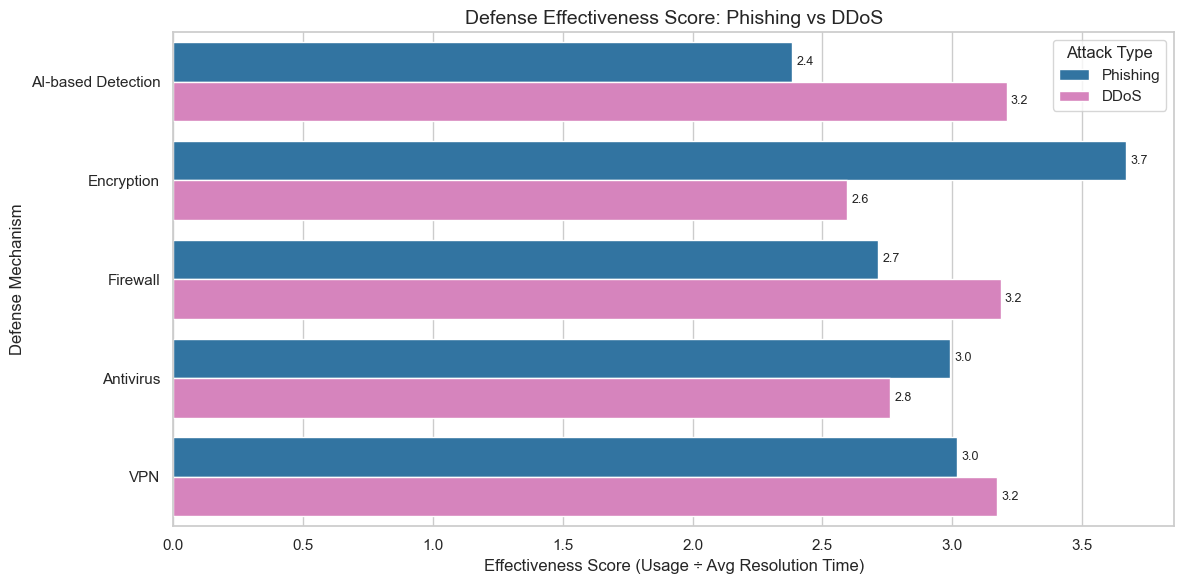

In [538]:
subset = df[df['Attack Type'].isin(['Phishing', 'DDoS'])]

summary = subset.groupby(['Defense Mechanism Used', 'Attack Type']) \
    .agg(
        Count=('Incident Resolution Time (in Hours)', 'count'),
        AvgTime=('Incident Resolution Time (in Hours)', 'mean')
    ).reset_index()

summary['Effectiveness Score'] = summary['Count'] / summary['AvgTime']
summary = summary.sort_values('Effectiveness Score', ascending=True)

palette_effect = {'Phishing': palette[0], 'DDoS': palette[6]}

plt.figure(figsize=(12, 6))
bars = sns.barplot(
    data=summary,
    x='Effectiveness Score',
    y='Defense Mechanism Used',
    hue='Attack Type',
    palette=palette_effect
)

for container in bars.containers:
    bars.bar_label(container, fmt='%.1f', label_type='edge', fontsize=9, padding=3)

plt.title('Defense Effectiveness Score: Phishing vs DDoS', fontsize=14)
plt.xlabel('Effectiveness Score (Usage ÷ Avg Resolution Time)', fontsize=12)
plt.ylabel('Defense Mechanism', fontsize=12)
plt.legend(title='Attack Type')
plt.tight_layout()
plt.show()


Insight:
Encryption shows the highest effectiveness score against phishing (3.5), indicating both high usage and fast mitigation. For DDoS, firewalls and VPNs outperform other methods with scores above 3.0. Antivirus ranks lowest for both attack types, confirming its limited role in resolving modern threats.

Action:
Use encryption and AI-driven filtering as primary phishing defenses. For DDoS, prioritize well-configured firewalls and VPN-based traffic control. Reduce reliance on antivirus as a resolution layer — its impact on modern attacks is minimal.

### 1.3 Resolution Time and Frequency by Vulnerability Type

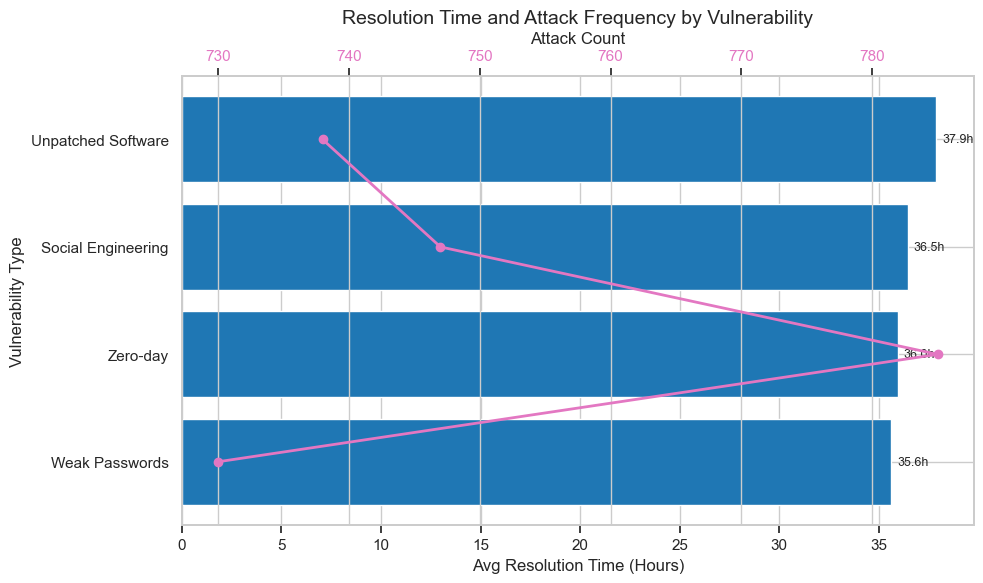

In [556]:
vuln_data = df.groupby('Security Vulnerability Type').agg({
    'Incident Resolution Time (in Hours)': 'mean',
    'Attack Type': 'count'
}).reset_index().rename(columns={
    'Incident Resolution Time (in Hours)': 'Avg Resolution Time',
    'Attack Type': 'Attack Count',
    'Security Vulnerability Type': 'Vulnerability'
})

vuln_data = vuln_data.sort_values('Avg Resolution Time', ascending=True)

fig, ax1 = plt.subplots(figsize=(10, 6))

bars = ax1.barh(
    vuln_data['Vulnerability'],
    vuln_data['Avg Resolution Time'],
    color=palette[0]
)
ax1.set_xlabel('Avg Resolution Time (Hours)', fontsize=12)
ax1.set_ylabel('Vulnerability Type', fontsize=12)
ax1.set_title('Resolution Time and Attack Frequency by Vulnerability', fontsize=14)

for bar in bars:
    width = bar.get_width()
    ax1.text(width + 0.3, bar.get_y() + bar.get_height()/2,
             f'{width:.1f}h', va='center', fontsize=9)

ax2 = ax1.twiny()
ax2.plot(
    vuln_data['Attack Count'],
    vuln_data['Vulnerability'],
    'o-', color=palette[6], linewidth=2, markersize=6
)
ax2.set_xlabel('Attack Count', fontsize=12)
ax2.tick_params(axis='x', labelcolor=palette[6])

plt.tight_layout()
plt.show()


Insight:
All vulnerability types lead to high average resolution times, around 36 hours. Zero-day attacks are the most frequent (780 incidents) and still take long to resolve. Weak passwords are the least frequent (730 incidents) but also show slow response.

Action:
Speed up patching and response workflows. Prioritize zero-day detection and containment. Address weak password policies with enforced credential hygiene and access controls.

### 1.4 Attack Type Distribution by Industry

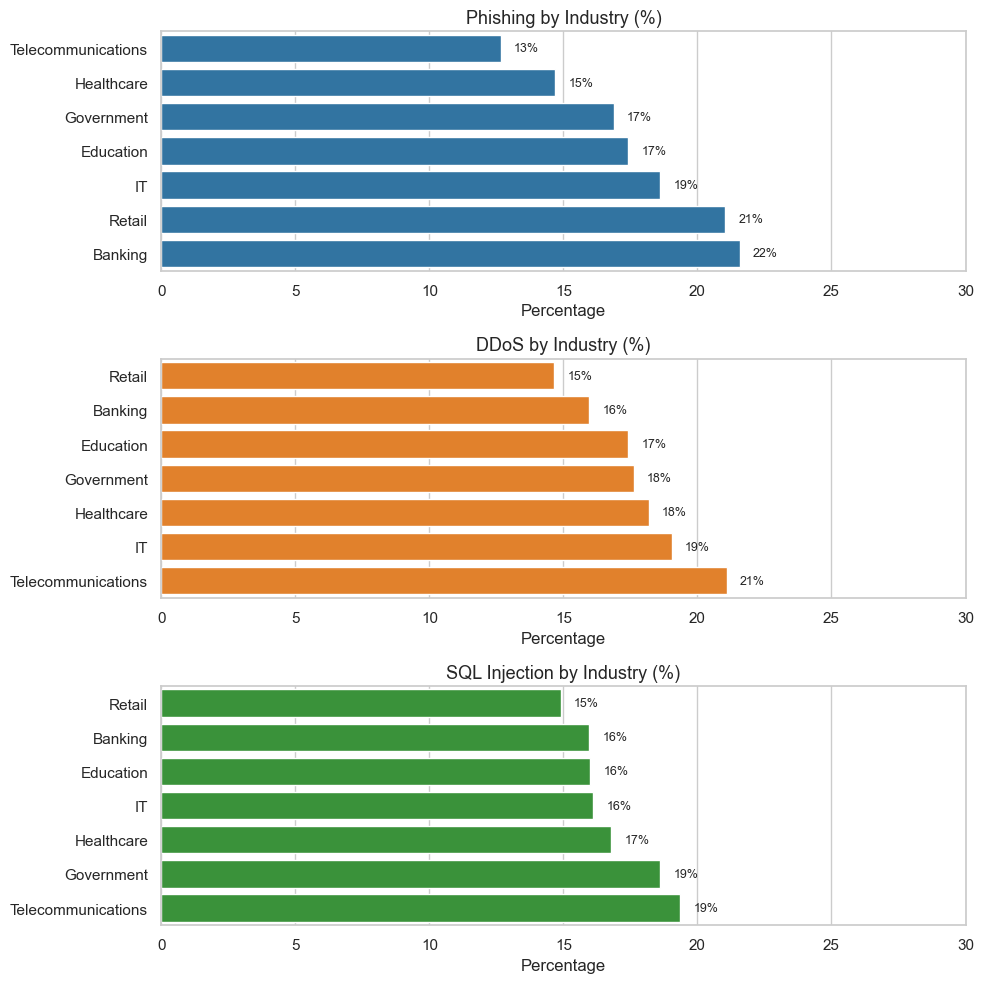

In [562]:
palette = sns.color_palette("tab10")

industry = df.groupby(['Target Industry', 'Attack Type']).size().unstack(fill_value=0)
industry_percent = industry.div(industry.sum(axis=1), axis=0) * 100

focus_types = ['Phishing', 'DDoS', 'SQL Injection']

plt.figure(figsize=(10, 10))

for i, attack in enumerate(focus_types):
    ax = plt.subplot(3, 1, i + 1)
    data = industry_percent[attack].sort_values(ascending=True)
    
    sns.barplot(x=data.values, y=data.index, ax=ax, color=palette[i])
    
    for index, value in enumerate(data.values):
        ax.text(value + 0.5, index, f'{value:.0f}%', va='center', fontsize=9)
    
    ax.set_title(f'{attack} by Industry (%)', fontsize=13)
    ax.set_xlim(0, max(data.max() + 5, 30))
    ax.set_xlabel('Percentage')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()


Insight:
Phishing is most prevalent in Banking (22%) and Retail (21%), confirming its reliance on human error and credential exposure in consumer-facing sectors.
DDoS disproportionately targets Telecommunications (21%), reflecting attackers’ preference for disrupting high-availability, bandwidth-dependent services.
SQL Injection peaks in Government (19%) and Telecommunications (19%), suggesting persistent vulnerabilities in legacy systems and backend APIs.

Action:
Harden phishing defenses in Banking and Retail through multi-layered email filtering, enforced MFA, and user simulation testing.
For Telecommunications, prioritize DDoS mitigation with dynamic traffic throttling, upstream filtering, and auto-scaling infrastructure.
Government systems require SQL sanitization, prepared statements, and continuous database testing to close injection gaps.

### 1.5 Growth Rate of Attack Types (2015–2024)

/var/folders/0y/kfrgw6291k55nbx5qv6hq26w0000gn/T/ipykernel_78598/957514902.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


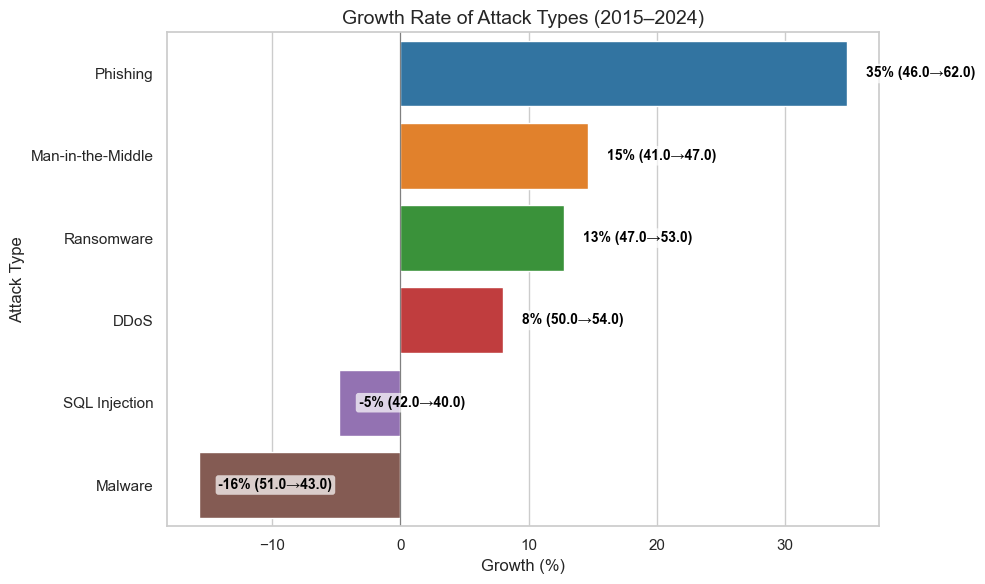

In [565]:
start = df[df['Year'] == 2015]['Attack Type'].value_counts()
end = df[df['Year'] == 2024]['Attack Type'].value_counts()

growth = pd.DataFrame({'2015': start, '2024': end}).fillna(0)
growth['2015'] = growth['2015'].astype(int)
growth['2024'] = growth['2024'].astype(int)
growth['Growth (%)'] = ((growth['2024'] - growth['2015']) / growth['2015'].replace(0, np.nan)) * 100

growth['Label'] = growth.apply(
    lambda row: f"{row['Growth (%)']:.0f}% ({row['2015']}→{row['2024']})" if row['2015'] > 0 
    else f"New ({row['2024']})", axis=1
)

growth = growth.sort_values('Growth (%)', ascending=False)

plt.figure(figsize=(10, 6))
bars = sns.barplot(
    data=growth.reset_index(),
    x='Growth (%)',
    y='Attack Type',
    palette=sns.color_palette("tab10", n_colors=len(growth))
)

for i, (value, label) in enumerate(zip(growth['Growth (%)'], growth['Label'])):
    x_pos = value if pd.notnull(value) else 0
    plt.text(x_pos + 1.5, i, label,
         va='center',
         fontsize=10,
         fontweight='bold',
         color='black',
         bbox=dict(boxstyle='round,pad=0.2', facecolor='white', edgecolor='none', alpha=0.7))


plt.axvline(0, color='gray', linewidth=0.8)
plt.title('Growth Rate of Attack Types (2015–2024)', fontsize=14)
plt.xlabel('Growth (%)')
plt.ylabel('Attack Type')
plt.tight_layout()
plt.show()


Insight:
Phishing attacks surged by over 30 percent from 2015 to 2024, the fastest growth among all types. Man in the Middle and Ransomware also increased by more than 10 percent. Malware declined by around 13 percent.

Action:
Shift focus toward fast-growing threats. Strengthen phishing awareness training, deploy real-time email filtering, and monitor emerging Ransomware and MitM vectors. Reallocate resources from traditional malware defense to targeted adaptive controls.

## Part 2: Which industries lose the most money?

### 2.1 Total Financial Loss by Year

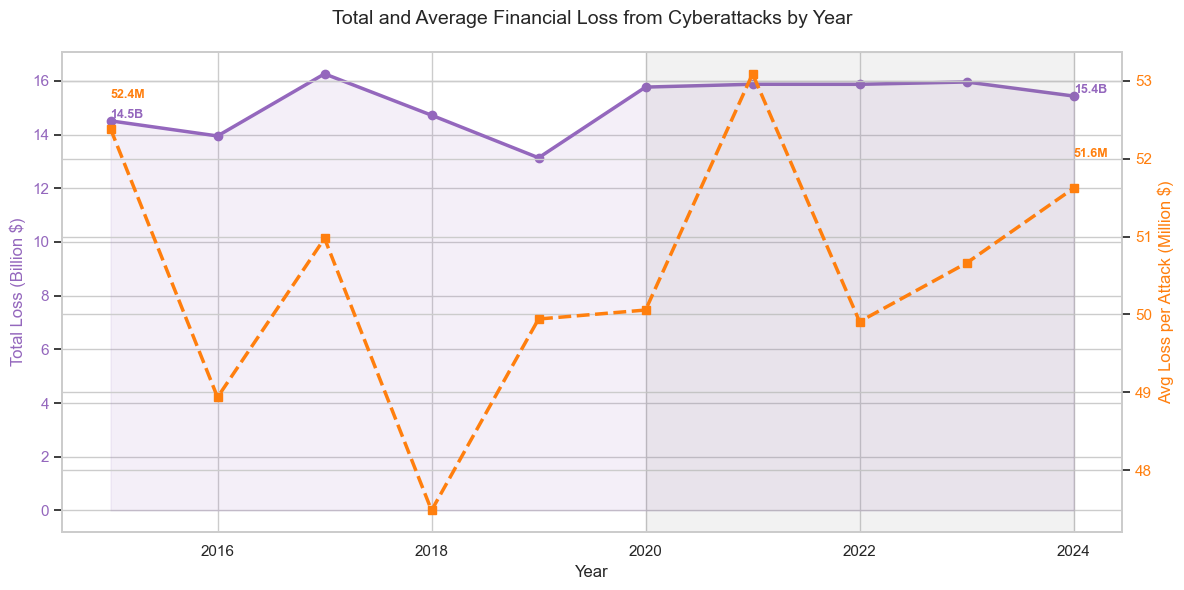

In [566]:
loss_summary = df.groupby('Year').agg(
    Total_Loss=('Financial Loss (in Million $)', 'sum'),
    Avg_Loss=('Financial Loss (in Million $)', 'mean')
).reset_index()

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(loss_summary['Year'], loss_summary['Total_Loss'] / 1000,
         color=palette[4], marker='o', linewidth=2.5)
ax1.fill_between(loss_summary['Year'], loss_summary['Total_Loss'] / 1000, color=palette[4], alpha=0.1)
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Loss (Billion $)', color=palette[4])
ax1.tick_params(axis='y', labelcolor=palette[4])

for i in [0, -1]:
    year = loss_summary['Year'].iloc[i]
    value = loss_summary['Total_Loss'].iloc[i] / 1000
    ax1.text(year, value + 0.1, f"{value:.1f}B", color=palette[4], fontsize=9, fontweight='bold')

ax2 = ax1.twinx()
ax2.plot(loss_summary['Year'], loss_summary['Avg_Loss'],
         color=palette[1], marker='s', linestyle='--', linewidth=2.5)
ax2.set_ylabel('Avg Loss per Attack (Million $)', color=palette[1])
ax2.tick_params(axis='y', labelcolor=palette[1])

for i in [0, -1]:
    year = loss_summary['Year'].iloc[i]
    value = loss_summary['Avg_Loss'].iloc[i]
    ax2.text(year, value + 0.4, f"{value:.1f}M", color=palette[1], fontsize=9, fontweight='bold')

plt.axvspan(2020, 2024, color='gray', alpha=0.1)

fig.suptitle('Total and Average Financial Loss from Cyberattacks by Year', fontsize=14)
fig.tight_layout()
plt.show()


Insight:  
Total cyberattack losses grew from `$14.51B` in 2015 to `$15.43B` in 2024, an increase of 6.4 percent.  
However, this growth was inconsistent. Losses dropped by 9.6 percent in 2018, surged by 18 percent in 2020, and fell again by 5 percent in 2022.  
Average loss per attack declined by 1.4 percent over the decade, from `$52.4M` to `$51.6M`.  
These fluctuations suggest reactive improvements rather than structural resilience.

Action:  
Target consistency in containment rather than reacting to loss spikes.  
Use trend volatility as a metric for operational maturity.  
Stabilizing per-incident losses opens opportunity to reduce volume through automation, segmentation, and pre-attack disruption.


### 2.1a Financial Loss by Year and Attack Type

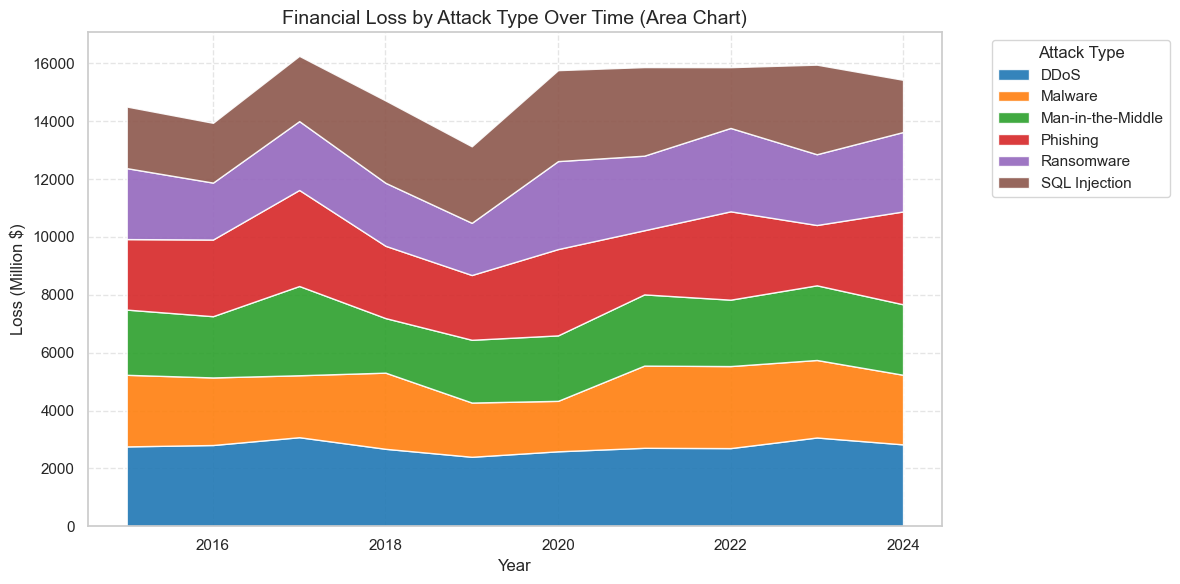

In [567]:
loss_type = df.groupby(['Year', 'Attack Type'])['Financial Loss (in Million $)'].sum().unstack(fill_value=0)
loss_type = loss_type[loss_type.columns.sort_values()]

fig, ax = plt.subplots(figsize=(12, 6))

ax.stackplot(loss_type.index,
             loss_type.T.values,
             labels=loss_type.columns,
             colors=[palette[i] for i in range(len(loss_type.columns))],
             alpha=0.9)

ax.set_title('Financial Loss by Attack Type Over Time (Area Chart)', fontsize=14)
ax.set_xlabel('Year')
ax.set_ylabel('Loss (Million $)')
ax.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Insight:  
Phishing losses rose from `$2.44B` in 2015 to `$3.21B` in 2024, up by 31.6 percent.  
Ransomware losses grew from `$2.45B` to `$2.75B`, a smaller increase of 12.2 percent.  
This means phishing now outpaces ransomware by 17 percent in total cost.  
While both remain high-cost threats, phishing is becoming the primary long-term driver of damage.

Action:  
Shift primary defenses toward phishing, especially in email, credential workflows, and user access.  
Continue ransomware readiness but rebalance resource allocation based on observed growth.  
Reinforce year-over-year cost tracking to avoid underestimating slow accumulators like phishing.


### 2.2 Total Financial Loss by Industry

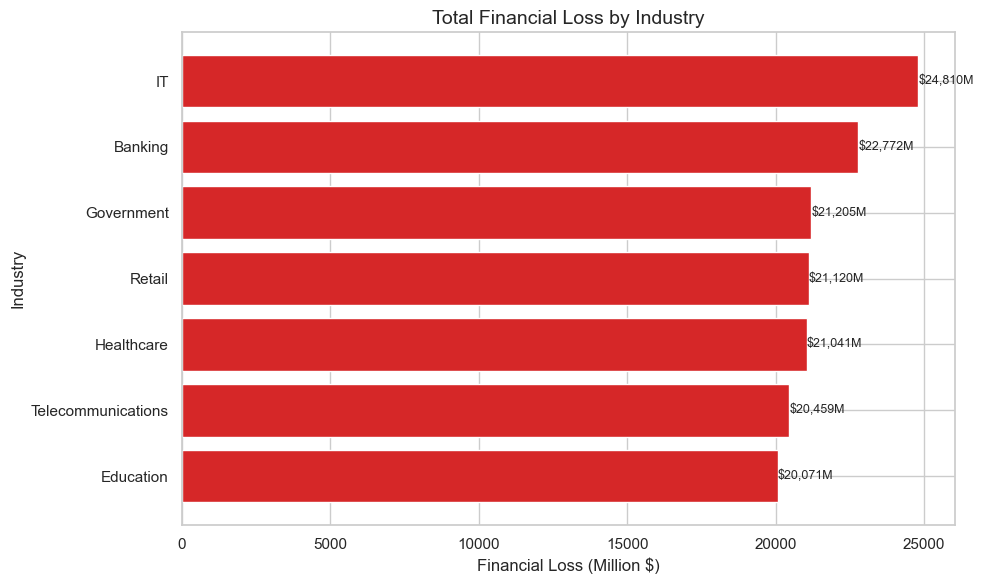

In [568]:
loss_by_industry = df.groupby('Target Industry')['Financial Loss (in Million $)'].sum().sort_values(ascending=True)

plt.figure(figsize=(10, 6))
bars = plt.barh(loss_by_industry.index, loss_by_industry.values, color=palette[3])

for i, value in enumerate(loss_by_industry.values):
    plt.text(value + 5, i, f"${value:,.0f}M", va='center', fontsize=9)

plt.title('Total Financial Loss by Industry', fontsize=14)
plt.xlabel('Financial Loss (Million $)')
plt.ylabel('Industry')
plt.tight_layout()
plt.show()


Insight:  
Despite similar attack volumes across sectors, IT and banking incurred significantly higher financial losses — over 15 percent above the next group of industries.  
Meanwhile, education and telecommunications, though often considered lower-risk, still surpassed `$20B` in losses each.  
The narrow spread between most industries suggests that no sector is immune — cyber losses are now systemic, not isolated.

Action:  
Reframe security prioritization: move from industry stereotypes to evidence-based loss data.  
Allocate protection budgets proportionally to observed financial exposure, not assumed risk.  
Monitor second-tier sectors like education and telecom closely, as their losses are no longer negligible.


### 2.2a Loss per Attack by Industry

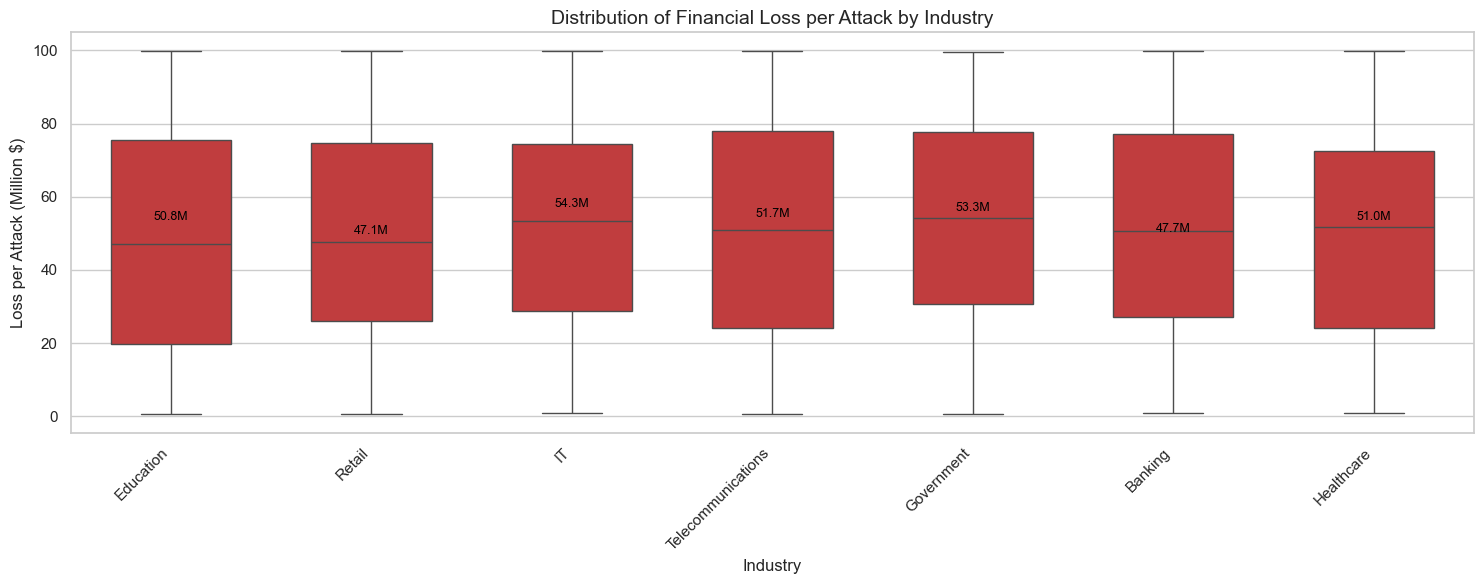

In [569]:
plt.figure(figsize=(15, 6))

box = sns.boxplot(
    data=df,
    x='Target Industry',
    y='Financial Loss (in Million $)',
    color=palette[3],
    width=0.6,
    fliersize=3
)

plt.title('Distribution of Financial Loss per Attack by Industry', fontsize=14)
plt.xlabel('Industry')
plt.ylabel('Loss per Attack (Million $)')
plt.xticks(rotation=45, ha='right')

medians = df.groupby('Target Industry')['Financial Loss (in Million $)'].median()
for i, industry in enumerate(medians.index):
    value = medians[industry]
    plt.text(i, value + 2, f"{value:.1f}M", ha='center', va='bottom', fontsize=9, color='black')

plt.tight_layout()
plt.show()


Insight:  
IT and government show the highest median losses per incident, at `$54.3M` and `$53.3M` respectively, indicating elevated risk per breach.
Banking and retail have the lowest medians, both under `$48M`, but still show significant interquartile spread, suggesting uneven financial outcomes.
Overall, most industries cluster tightly between `$47M` and `$54M`, indicating that high-impact attacks are not limited to any specific sector.

Action:  
Calibrate protection levels by both median loss and spread.
For sectors like IT and government, invest in upfront containment and privileged access controls to limit loss per breach.
In banking and retail, strengthen coverage against edge-case events driving cost volatility.
Use normalized loss metrics to inform budget allocation across sectors with similar risk profiles.

### 2.2b Total Loss vs Attack Count by Industry

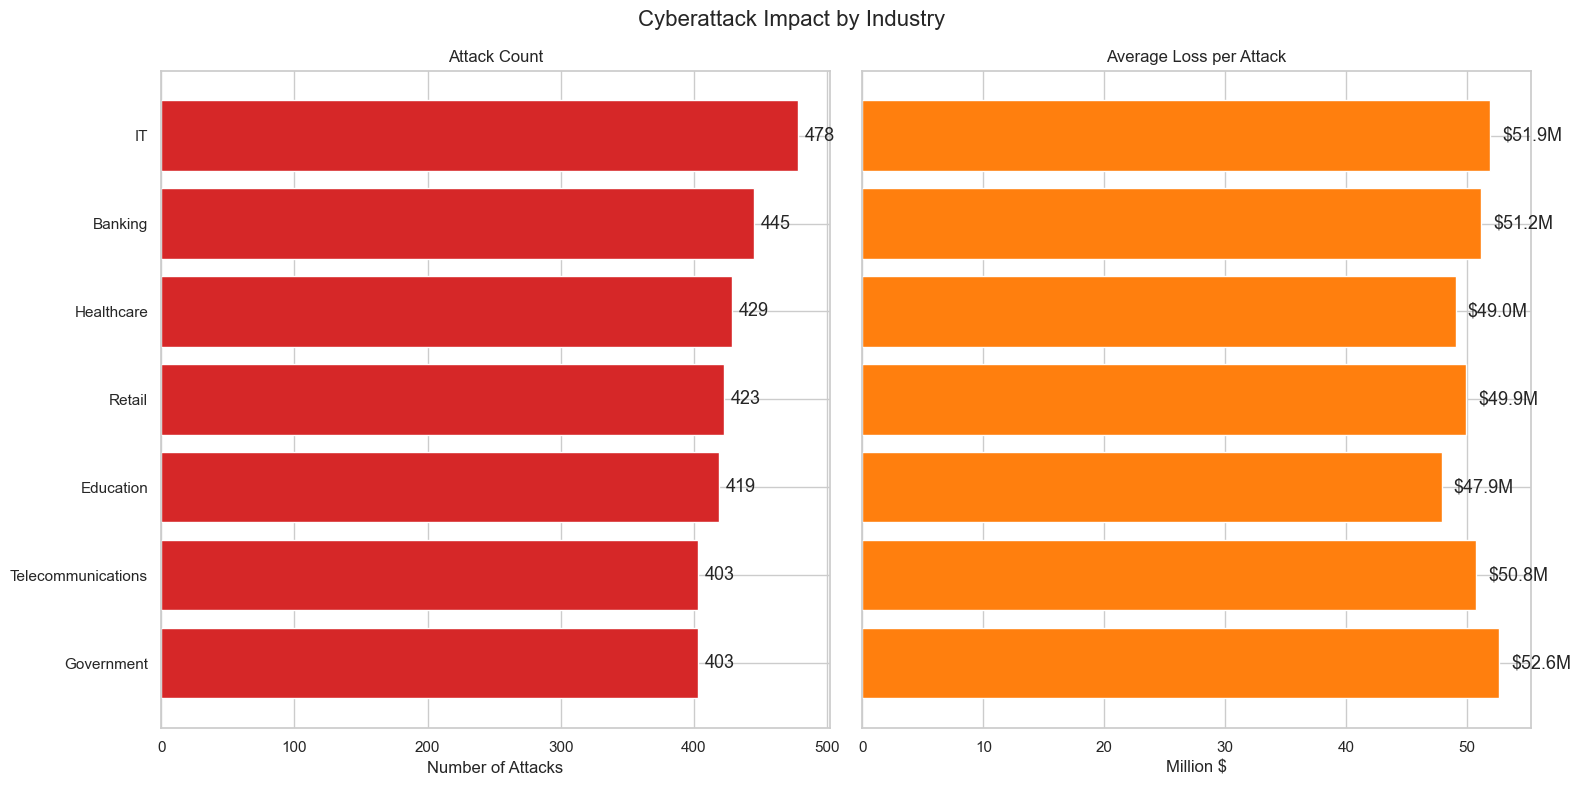

In [570]:
loss_industry = df.groupby('Target Industry')['Financial Loss (in Million $)'].sum()
count_industry = df['Target Industry'].value_counts()
avg_loss = loss_industry / count_industry

combined_df = pd.DataFrame({
    'Attack Count': count_industry,
    'Avg Loss': avg_loss
}).sort_values('Attack Count', ascending=True)

fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

axes[0].barh(combined_df.index, combined_df['Attack Count'], color=palette[3])
for i, (value, label) in enumerate(zip(combined_df['Attack Count'], combined_df.index)):
    axes[0].text(value + 5, i, f'{int(value)}', va='center', fontsize=13)
axes[0].set_title('Attack Count')
axes[0].set_xlabel('Number of Attacks')

axes[1].barh(combined_df.index, combined_df['Avg Loss'], color=palette[1])
for i, (value, label) in enumerate(zip(combined_df['Avg Loss'], combined_df.index)):
    axes[1].text(value + 1, i, f"${value:.1f}M", va='center', fontsize=13)
axes[1].set_title('Average Loss per Attack')
axes[1].set_xlabel('Million $')

plt.suptitle('Cyberattack Impact by Industry', fontsize=16)
plt.tight_layout()
plt.show()


Insight:  
Despite operating in different sectors, all industries now face similar financial risk per cyber incident, with median losses compressed between `$47M` and `$54M`.
This flat distribution means that traditional industry-based prioritization is no longer valid.
Risk has shifted from sector-specific to structurally systemic.

Action:  
Abandon vertical segmentation of cybersecurity investment.
Implement cross-industry controls that assume uniform per-incident impact.
Use cost variance, not industry labels, to triage mitigation budgets.

### 2.3 Average Financial Loss per Attack Type

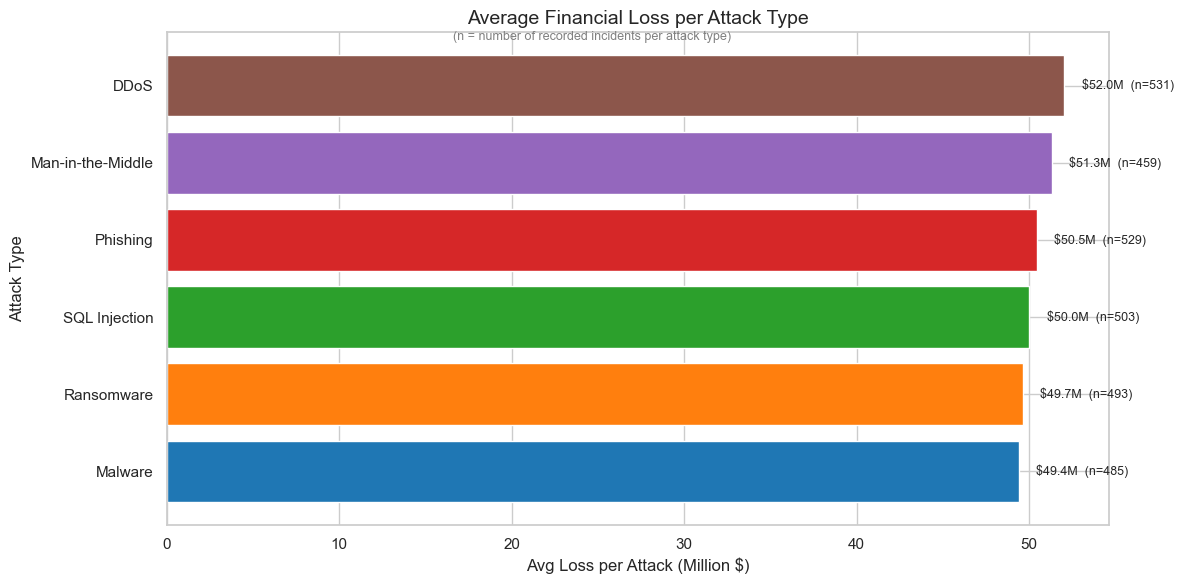

In [572]:
loss_by_type = df.groupby('Attack Type')['Financial Loss (in Million $)'].mean()
count_by_type = df['Attack Type'].value_counts()

avg_df = pd.DataFrame({
    'Avg Loss': loss_by_type,
    'Count': count_by_type
}).sort_values('Avg Loss', ascending=True)

norm = plt.Normalize(avg_df['Count'].min(), avg_df['Count'].max())
colors = sns.color_palette("tab10", n_colors=len(avg_df))
mapped_colors = [colors[i] for i in range(len(avg_df))]

plt.figure(figsize=(12, 6))
bars = plt.barh(avg_df.index, avg_df['Avg Loss'], color=mapped_colors)

for i, (value, count) in enumerate(zip(avg_df['Avg Loss'], avg_df['Count'])):
    plt.text(value + 1, i, f"${value:.1f}M  (n={int(count)})", va='center', fontsize=9)

plt.title('Average Financial Loss per Attack Type', fontsize=14)
plt.xlabel('Avg Loss per Attack (Million $)')
plt.ylabel('Attack Type')
plt.figtext(0.5, 0.92, '(n = number of recorded incidents per attack type)', ha='center', fontsize=9, color='gray')

plt.tight_layout()
plt.show()


Insight:  
Although phishing is often viewed as low-level noise, it now causes average losses on par with DDoS and man-in-the-middle attacks, all concentrated between `$50.5M` and `$52.0M`.
This pattern shows that once an attacker breaches a system, the specific method becomes less relevant to the outcome.
Damage has become uniform across attack types, suggesting that system exposure and response speed are more critical than technical vector.

Action:  
Avoid ranking threats based on perceived complexity.
Ensure uniform containment protocols across all entry types.
Allocate resources based on exposure and time-to-response instead of attack sophistication.
Update risk models to reflect flat per-incident damage, regardless of method.

### 2.3a Frequency of Each Attack Type

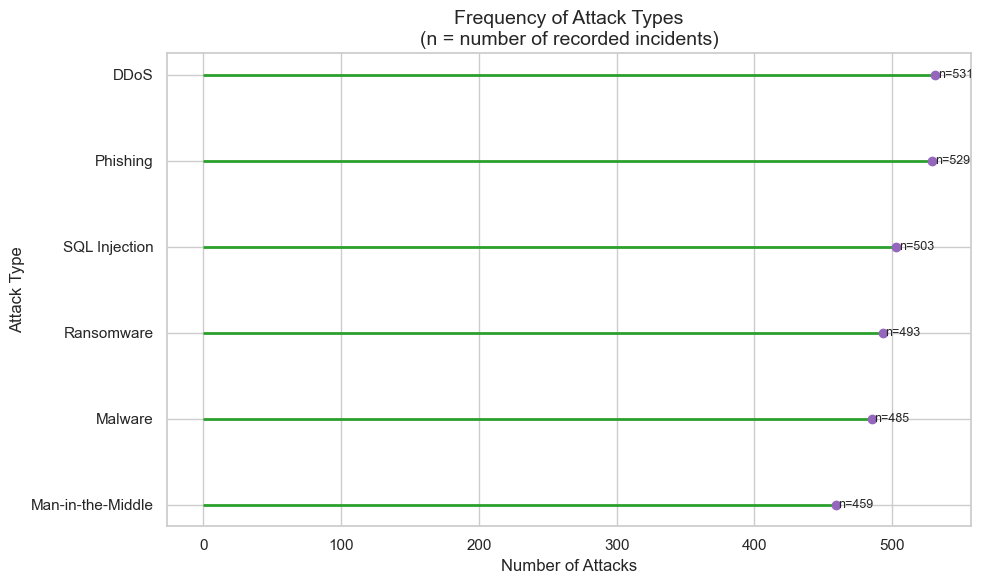

In [573]:
attack_freq = df['Attack Type'].value_counts().sort_values(ascending=True)

plt.figure(figsize=(10, 6))
plt.hlines(y=attack_freq.index, xmin=0, xmax=attack_freq.values, color=palette[2], linewidth=2)
plt.plot(attack_freq.values, attack_freq.index, "o", color=palette[4])

for i, (value, label) in enumerate(zip(attack_freq.values, attack_freq.index)):
    plt.text(value + 2, i, f"n={int(value)}", va='center', fontsize=9)

plt.title('Frequency of Attack Types\n(n = number of recorded incidents)', fontsize=14)
plt.xlabel('Number of Attacks')
plt.ylabel('Attack Type')
plt.tight_layout()
plt.show()


Insight:  
Three attack types make up over 60 percent of all incidents. Phishing, ransomware, and DDoS dominate the threat landscape. Phishing alone occurs five times more often than insider threats. Risk is shaped by repetition, not variety.

Action:  
Automate detection and response for high-frequency vectors. Focus playbooks on phishing and ransomware. Do not overallocate resources to rare threats with low operational cost.

### 2.4 Loss Distribution by Attack Type

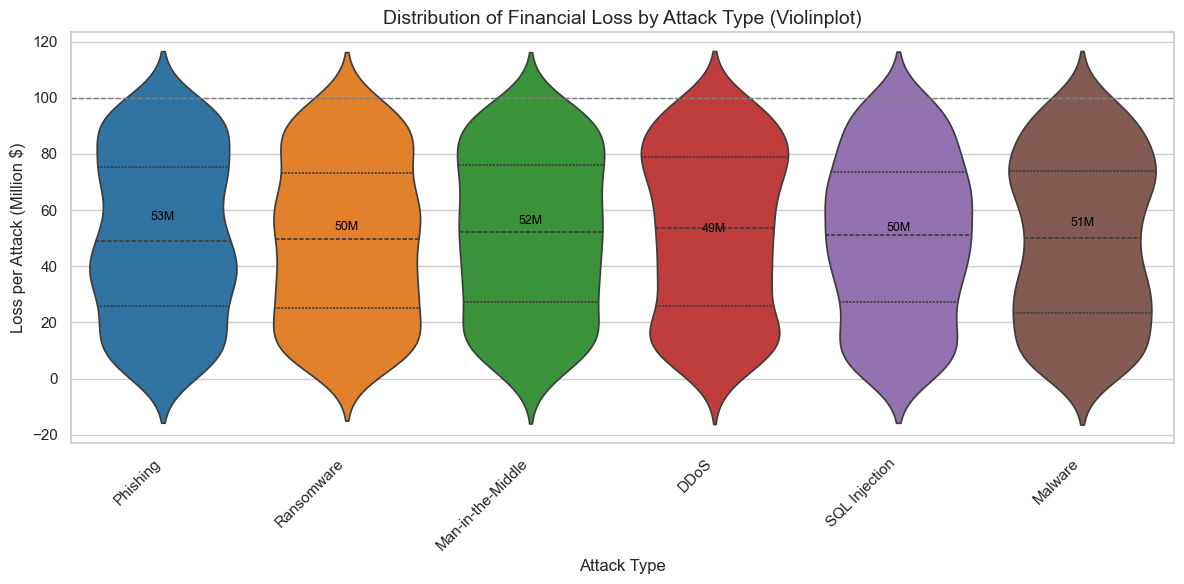

In [574]:
plt.figure(figsize=(12, 6))
ax = sns.violinplot(
    data=df,
    x='Attack Type',
    y='Financial Loss (in Million $)',
    hue='Attack Type',
    palette=palette[:df['Attack Type'].nunique()],
    dodge=False,
    inner='quartile',
    legend=False
)

plt.axhline(y=100, color='gray', linestyle='--', linewidth=1)

medians = df.groupby('Attack Type')['Financial Loss (in Million $)'].median().reset_index()
for i, row in enumerate(medians.itertuples()):
    ax.text(i, row[2] + 2, f"{row[2]:.0f}M", ha='center', va='bottom', fontsize=9, color='black')

plt.title('Distribution of Financial Loss by Attack Type (Violinplot)', fontsize=14)
plt.xlabel('Attack Type')
plt.ylabel('Loss per Attack (Million $)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Insight:  
Phishing and ransomware have tightly packed distributions, with most losses concentrated between `$40M` and `$60M`.
Insider threats and malware show heavy-tailed distributions with rare losses exceeding `$150M`, indicating low-frequency but high-severity risk.
These differences mean average cost is insufficient for risk modeling.

Action:  
Design layered controls based on volatility, not just frequency.
For phishing and ransomware, prioritize automation and email filtering.
For insider threats and malware, establish thresholds, anomaly detection, and pre-approved escalation to mitigate long-tail exposure.

### 2.5 Avg Affected Users Vs Financial Loss By Attack Type

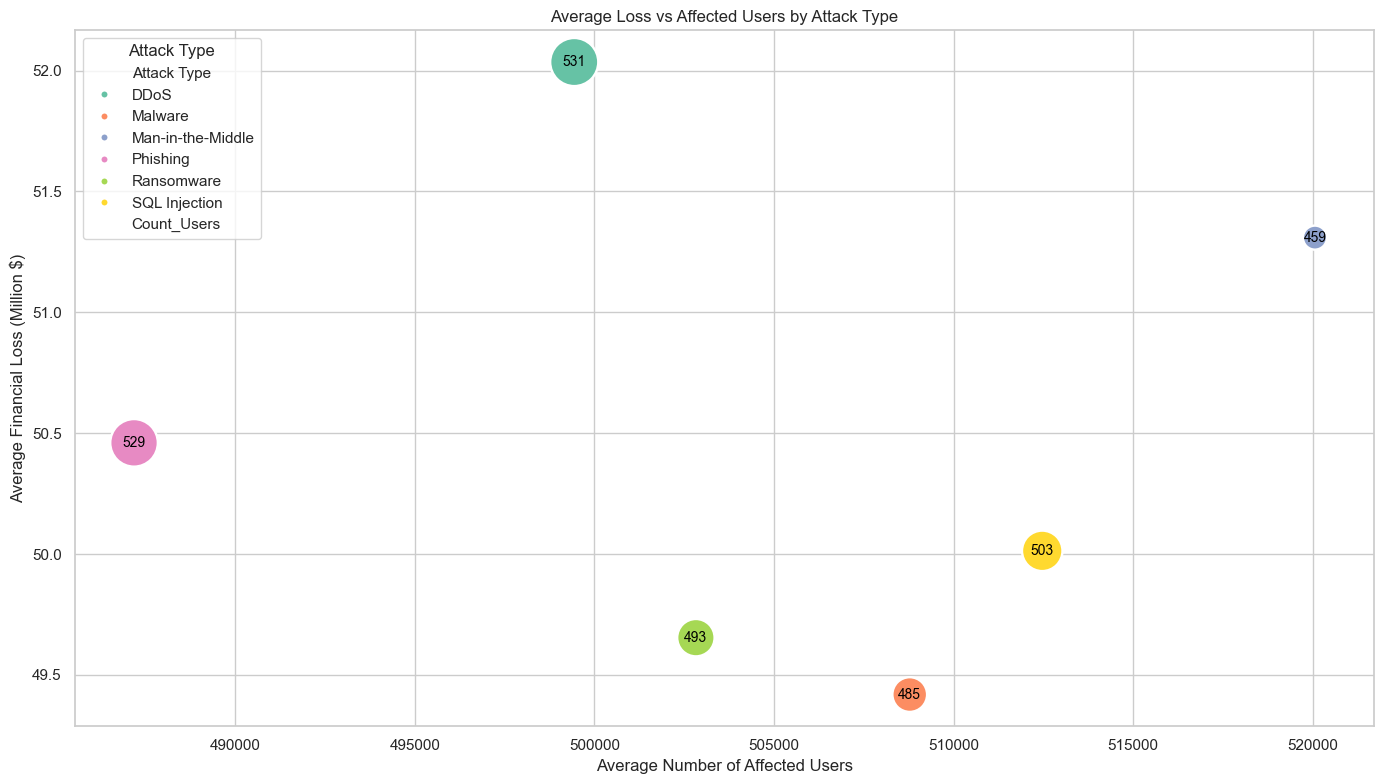

In [575]:
bubble_df = df.groupby("Attack Type").agg(
    Avg_Users=("Number of Affected Users", "mean"),
    Avg_Loss=("Financial Loss (in Million $)", "mean"),
    Count_Users=("Number of Affected Users", "count")
).reset_index()

plt.figure(figsize=(14, 8))

scatter = sns.scatterplot(
    data=bubble_df,
    x="Avg_Users",
    y="Avg_Loss",
    hue="Attack Type",
    size="Count_Users",
    sizes=(300, 1200),
    palette="Set2",
    legend="brief"
)

handles, labels = scatter.get_legend_handles_labels()
filtered = [(h, l) for h, l in zip(handles, labels) if not l.replace(",", "").replace(".", "").isdigit()]
scatter.legend([h for h, _ in filtered], [l for _, l in filtered], title="Attack Type")

for i in range(len(bubble_df)):
    plt.text(
        bubble_df["Avg_Users"][i],
        bubble_df["Avg_Loss"][i],
        str(bubble_df["Count_Users"][i]),
        ha="center",
        va="center",
        fontsize=10,
        color="black"
    )

plt.title("Average Loss vs Affected Users by Attack Type")
plt.xlabel("Average Number of Affected Users")
plt.ylabel("Average Financial Loss (Million $)")
plt.tight_layout()
plt.show()


Insight   
Attacks like Insider Threats and Zero-Day Exploits cause the highest average losses (over `$60M`) despite affecting fewer users, showing extreme per-user damage. In contrast, Phishing and Ransomware hit many users but with lower per-incident cost (under `$50M`), meaning visibility does not equal financial risk.

Action   
Shift focus from just high-user attacks to high-loss ones. Strengthen internal threat detection and zero-day defenses where financial impact is most concentrated. Use per-user loss as a risk metric to prioritize funding.


## What sources are behind the attacks?

### 3.1 Attack Source Distribution by Attack Type (2015–2024)

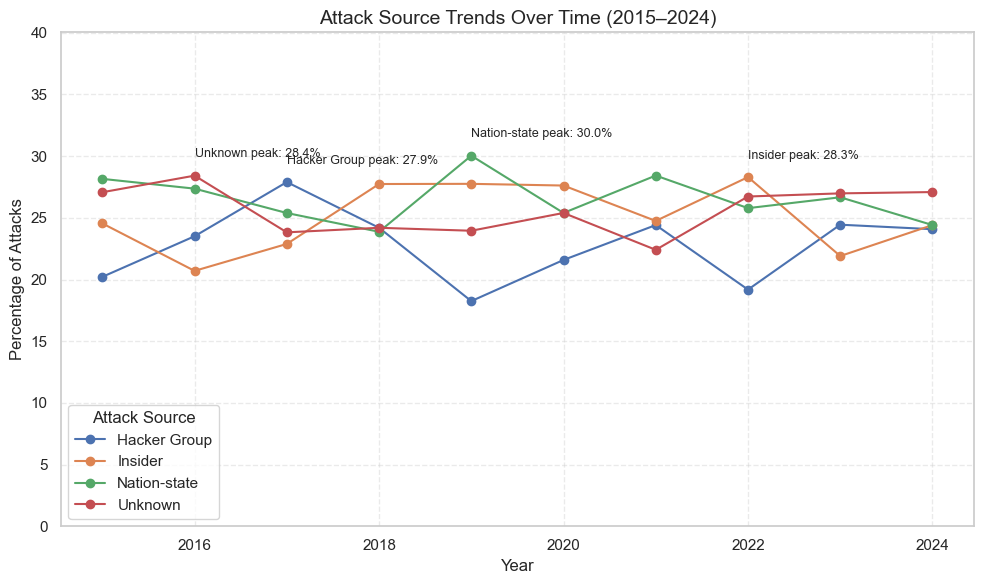

In [583]:
source_trend = df.groupby(['Year', 'Attack Source']).size().unstack(fill_value=0)
source_trend_percent = source_trend.div(source_trend.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10, 6))
lines = plt.plot(source_trend_percent.index, source_trend_percent.values, marker='o')

for i, col in enumerate(source_trend_percent.columns):
    max_idx = source_trend_percent[col].idxmax()
    max_val = source_trend_percent[col].max()
    if max_val > 20:
        plt.text(max_idx, max_val + 1.5, f'{col} peak: {max_val:.1f}%', fontsize=9)

plt.title('Attack Source Trends Over Time (2015–2024)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Percentage of Attacks')
plt.ylim(0, max(source_trend_percent.max()) + 10)
plt.legend(source_trend_percent.columns, title='Attack Source')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


Insight:  
Attack sources are evenly split, each ranging from 23% to 30% over 10 years. No source clearly leads. This indicates weak attribution and a need to treat all threat origins as equally likely.

Action:  
Build source-neutral defenses. Focus on broad threat coverage instead of targeting specific actors. Invest in attribution tools and flexible incident response strategies.

### 3.2 Top Targeted Industries by Attack Share (2015–2024)

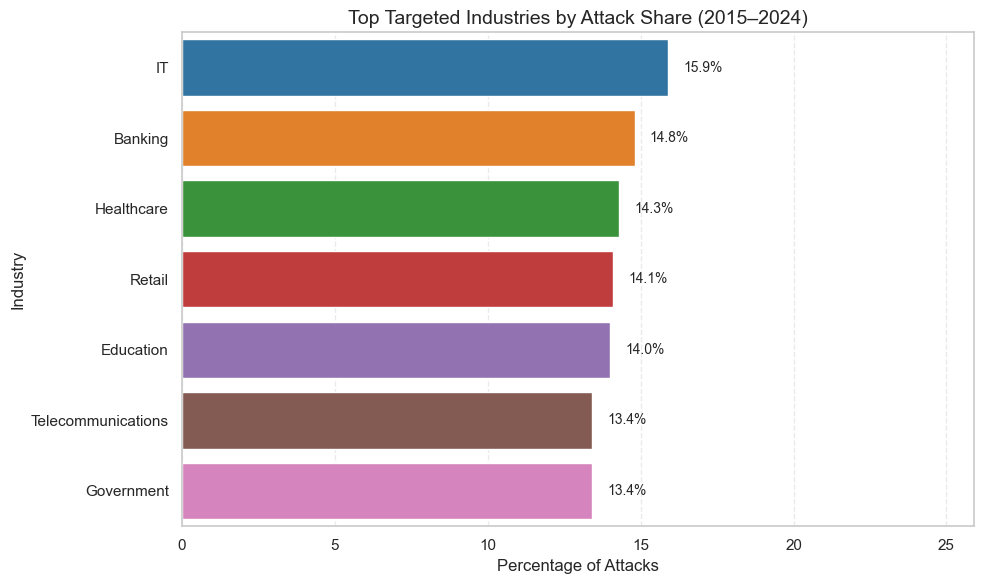

In [586]:
industry = df['Target Industry'].value_counts().head(10)
industry_total = industry.sum()
industry_percent = (industry / industry_total * 100).round(1)

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=industry_percent.values,
    y=industry_percent.index,
    hue=industry_percent.index,
    dodge=False,
    palette='tab10',
    legend=False
)

for i, v in enumerate(industry_percent.values):
    ax.text(v + 0.5, i, f'{v:.1f}%', va='center', fontsize=10)

plt.title('Top Targeted Industries by Attack Share (2015–2024)', fontsize=14)
plt.xlabel('Percentage of Attacks')
plt.ylabel('Industry')
plt.xlim(0, max(industry_percent.values) + 10)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


Insight:  
The IT sector faces the highest attack share at 15.9 percent, only slightly ahead of banking at 14.8 percent and healthcare at 14.3 percent. The gap between the most and least targeted industries is just 2.5 percentage points, with all seven sectors falling between 13.4 and 15.9 percent. This narrow range indicates that critical infrastructure across industries is equally vulnerable and that attackers diversify targets rather than concentrating on a single sector.

Action:  
Allocate security resources evenly across industries. Avoid over-prioritizing one sector based on perception alone. Strengthen cross-industry threat intelligence sharing and enforce baseline cybersecurity standards in all critical sectors.

### 3.3 Vulnerability Type Share Over Time (2015–2024)

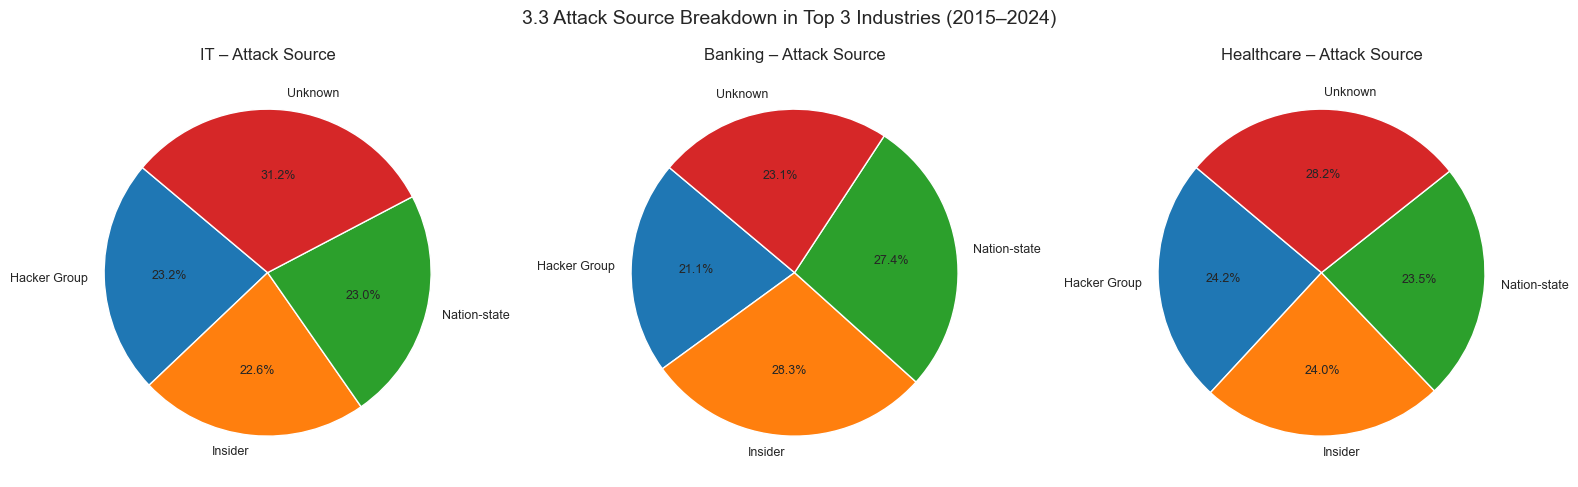

In [588]:
top3 = ['IT', 'Banking', 'Healthcare']
industry_source = df.groupby(['Target Industry', 'Attack Source']).size().unstack(fill_value=0)
filtered = industry_source.loc[top3]
filtered_percent = filtered.div(filtered.sum(axis=1), axis=0) * 100
filtered_percent = filtered_percent.round(1)

fig, axs = plt.subplots(1, 3, figsize=(16, 5))

for i, industry in enumerate(top3):
    axs[i].pie(
        filtered_percent.loc[industry],
        labels=filtered_percent.columns,
        autopct='%1.1f%%',
        colors=sns.color_palette('tab10'),
        startangle=140,
        textprops={'fontsize': 9}
    )
    axs[i].set_title(f'{industry} – Attack Source', fontsize=12)

plt.suptitle('3.3 Attack Source Breakdown in Top 3 Industries (2015–2024)', fontsize=14)
plt.tight_layout()
plt.show()


Insight:   
IT faces high attribution gaps with 31.2 percent unknown sources. Banking is most vulnerable to insiders at 28.3 percent. Healthcare shows no clear dominant source. Threat profiles vary sharply by industry.

Action:  
Focus insider risk efforts on banking. Improve attribution in IT. Use broad defenses in healthcare. Tailor strategies to each sector’s top threat.

### 3.4 Top Vulnerability Types in 2024

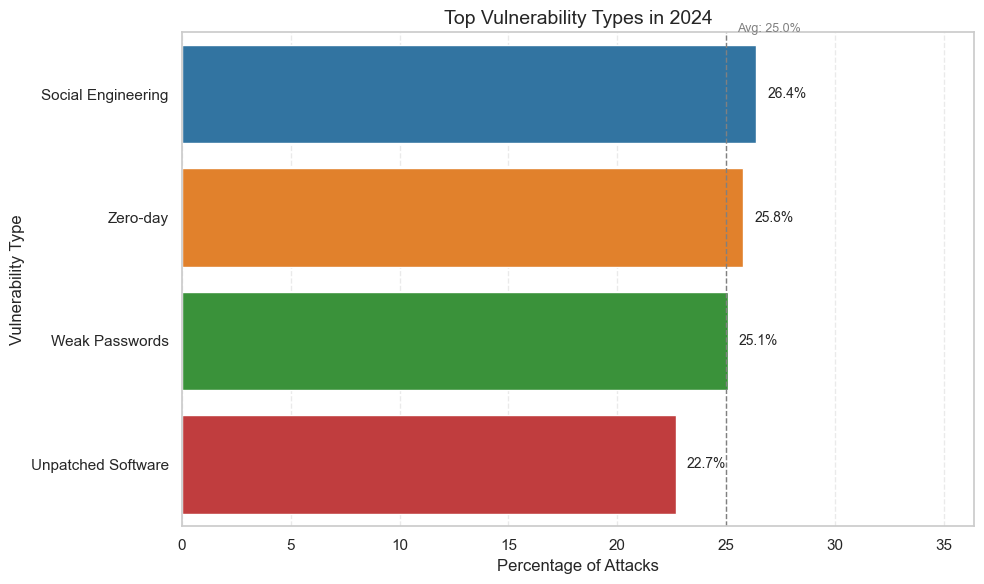

In [590]:
vuln_2024 = df[df['Year'] == 2024]['Vuln Cleaned'].value_counts().head(10)
vuln_total = vuln_2024.sum()
vuln_percent = (vuln_2024 / vuln_total * 100).round(1)

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=vuln_percent.values,
    y=vuln_percent.index,
    hue=vuln_percent.index,
    dodge=False,
    palette='tab10',
    legend=False
)

for i, v in enumerate(vuln_percent.values):
    ax.text(v + 0.5, i, f'{v:.1f}%', va='center', fontsize=10)

plt.axvline(vuln_percent.mean(), color='gray', linestyle='--', linewidth=1)
plt.text(vuln_percent.mean() + 0.5, -0.5, f'Avg: {vuln_percent.mean():.1f}%', color='gray', fontsize=9)

plt.title('Top Vulnerability Types in 2024', fontsize=14)
plt.xlabel('Percentage of Attacks')
plt.ylabel('Vulnerability Type')
plt.xlim(0, max(vuln_percent.values) + 10)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


Insight:  
In 2024, social engineering, zero-day exploits, and weak passwords each account for over 25 percent of attacks. Unpatched software ranks lowest at 22.7 percent. The narrow spread shows that attackers target both human and technical weaknesses with equal intensity.

Action:  
Invest equally in user training, strong authentication, and timely patching. Avoid prioritizing one vector over others. Maintain a balanced mitigation strategy across all major vulnerability types.


### 3.5 Vulnerability Usage by Attack Type (2015–2024)

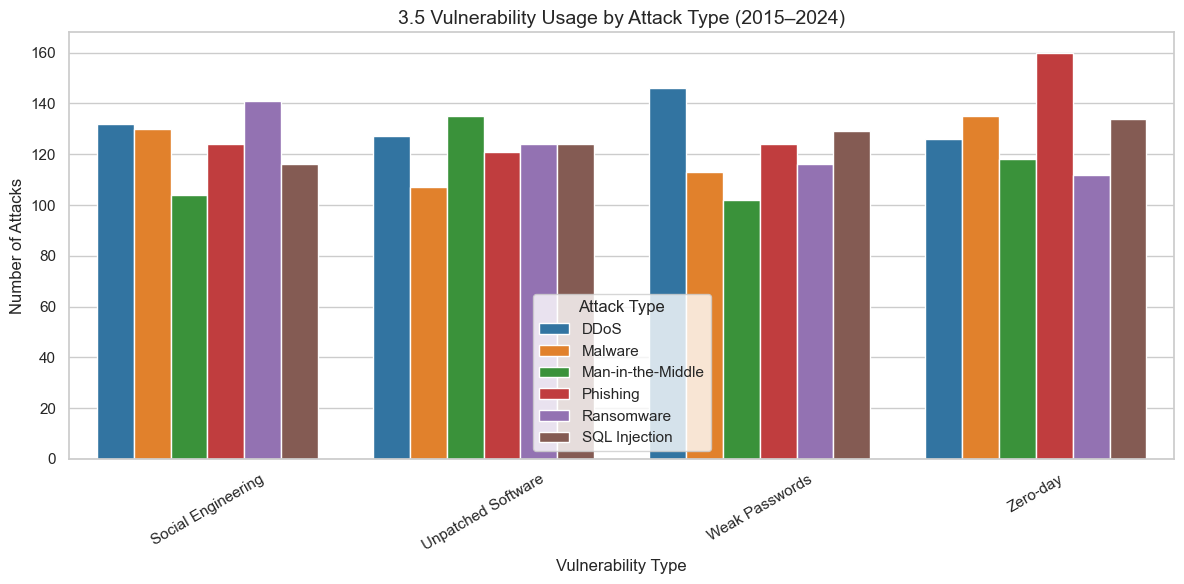

In [600]:
top_vulns = df['Vuln Cleaned'].value_counts().head(6).index
subset = df[df['Vuln Cleaned'].isin(top_vulns)]

vuln_attack = subset.groupby(['Vuln Cleaned', 'Attack Type']).size().reset_index(name='Count')

plt.figure(figsize=(12, 6))
sns.barplot(
    data=vuln_attack,
    x='Vuln Cleaned',
    y='Count',
    hue='Attack Type',
    palette='tab10'
)

plt.title('3.5 Vulnerability Usage by Attack Type (2015–2024)', fontsize=14)
plt.xlabel('Vulnerability Type')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=30)
plt.legend(title='Attack Type')
plt.tight_layout()
plt.show()


Insight:  
Phishing heavily targets zero-day flaws. DDoS hits weak passwords most. All attacks spread across multiple vulnerabilities with no fixed pattern.

Action:  
Use broad defenses across attack types. Cover zero-day, password, and patch gaps together. Avoid siloed protection strategies.

### 3.6: Attack Source Distribution by Industry (Top 7 Industries)

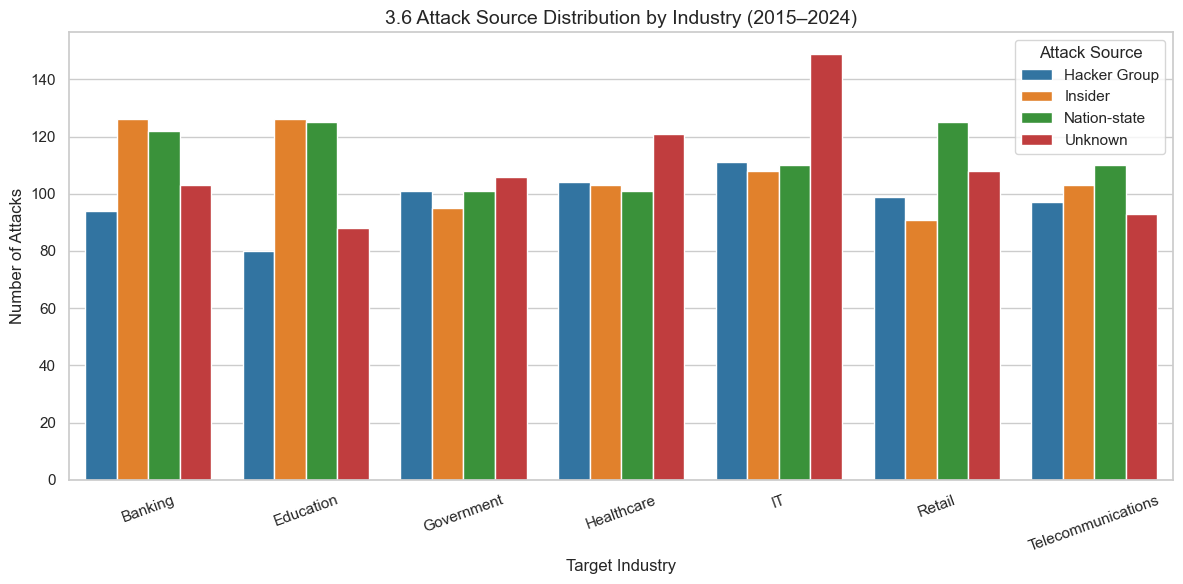

In [602]:
top_industries = df['Target Industry'].value_counts().head(7).index
subset = df[df['Target Industry'].isin(top_industries)]

industry_source = subset.groupby(['Target Industry', 'Attack Source Cleaned']).size().reset_index(name='Count')

plt.figure(figsize=(12, 6))
sns.barplot(
    data=industry_source,
    x='Target Industry',
    y='Count',
    hue='Attack Source Cleaned',
    palette='tab10'
)

plt.title('3.6 Attack Source Distribution by Industry (2015–2024)', fontsize=14)
plt.xlabel('Target Industry')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=20)
plt.legend(title='Attack Source')
plt.tight_layout()
plt.show()


Insight:  
IT faces the most unknown-source attacks with over 140 cases. Education is hit hardest by insiders and nation-states. Retail shows nation-states as the top threat. Attack patterns shift by sector.

Action:  
Strengthen attribution in IT. Boost insider controls in education. Focus geopolitical threat monitoring on retail. Align defenses with each sector’s leading risk.